<a href="https://colab.research.google.com/github/Sohith-Pothula/My-Data-Science-Journey/blob/main/Breast_Cancer_%7BBinomial_Logistic_Regression%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.8f}%")

Logistic Regression model accuracy: 96.49122807%


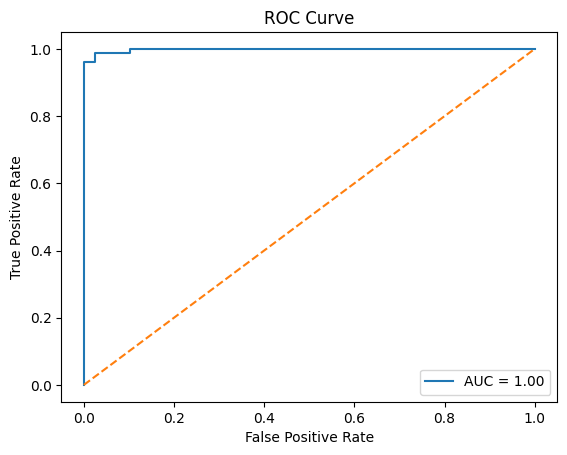

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_probs = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


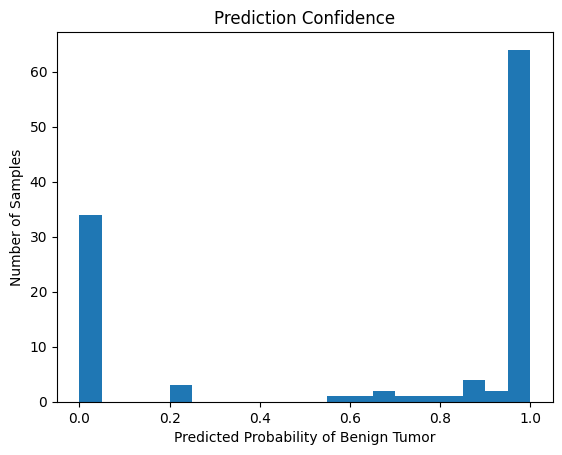

In [6]:
plt.figure()
plt.hist(y_probs, bins=20)
plt.xlabel("Predicted Probability of Benign Tumor")
plt.ylabel("Number of Samples")
plt.title("Prediction Confidence")
plt.show()


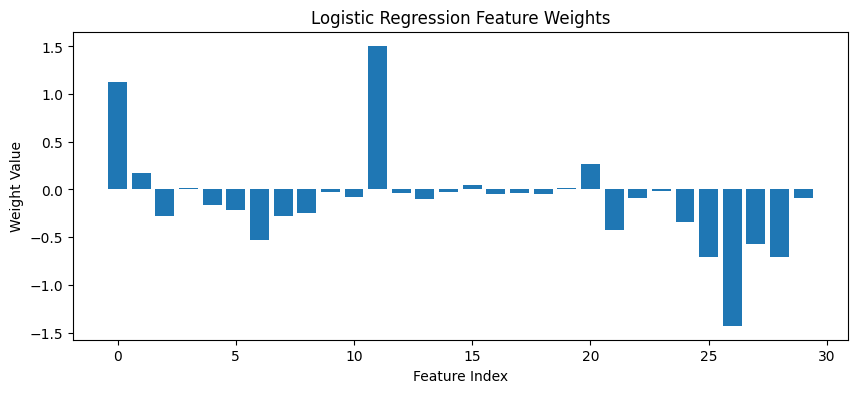

In [7]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(clf.coef_[0])), clf.coef_[0])
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.title("Logistic Regression Feature Weights")
plt.show()


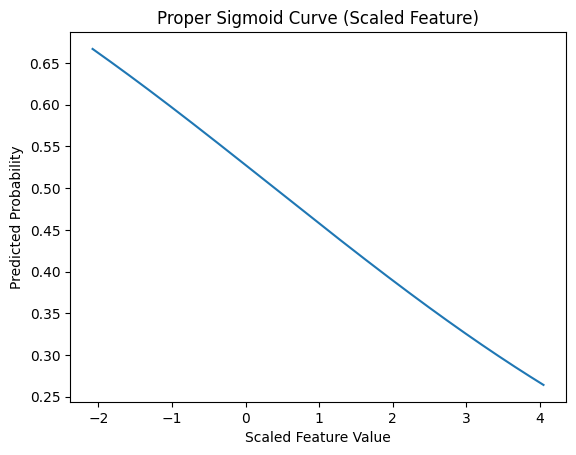

In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Train model on scaled data
clf_scaled = LogisticRegression(max_iter=10000)
clf_scaled.fit(X_scaled, y_train)

# Choose one feature
z = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 300)

w = clf_scaled.coef_[0][0]
b = clf_scaled.intercept_[0]

sigmoid = 1 / (1 + np.exp(-(w * z + b)))

# Plot
plt.figure()
plt.plot(z, sigmoid)
plt.xlabel("Scaled Feature Value")
plt.ylabel("Predicted Probability")
plt.title("Proper Sigmoid Curve (Scaled Feature)")
plt.show()
